In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Joining DataFrame

In [3]:
bikes = pd.read_csv('citybike_station.csv')

In [4]:
total_bus = pd.read_csv('total_bus.csv')

In [5]:
bikes

,empty_slots,free_bikes,id,latitude,longitude,name,timestamp,address,ebikes,slots,post_code
0,2,14,56b378804489251389834c2b80a46bb5,46.786588,-71.258231,Parc Anet-Gomin,2023-06-04T03:45:13.014000Z,Parc Anet-Gomin,14,16,NaN
1,6,4,ef6ae1f7443f70f55803f679f8802b63,46.784041,-71.249391,Sheppard / William,2023-06-04T03:45:13.016000Z,Sheppard / William,4,16,NaN
2,10,5,c3750bd43baae2ae3febc0f6d41f724a,46.829433,-71.244066,ExpoCité - Grand Marché,2023-06-04T03:45:13.017000Z,Grand Marché,5,16,123456
3,7,8,2ef1039f944f63cf78a0b7b6d55ad32c,46.812403,-71.220411,Lavigueur / Sainte-Geneviève,2023-06-04T03:45:13.017000Z,Lavigueur,8,16,NaN
4,12,8,19f294ef4bd34e8454e9036badca8cb4,46.826553,-71.245978,ExpoCité - Place Jean-Béliveau,2023-06-04T03:45:13.018000Z,ExpoCité,8,20,J4G 2H9
...,...,...,...,...,...,...,...,...,...,...,...
69,14,4,dfaec4cfae6b372f10b2fb48735d5457,46.817650,-71.208739,Bassin Louise,2023-06-04T03:45:13.059000Z,Bassin Louise,4,19,123456
70,2,14,89cbe638d67345f3866a69425e81f6e1,46.807598,-71.244166,Raoul-Jobin / Marie-de-l'Incarnation,2023-06-04T03:45:13.024000Z,Raoul-Jobin / Marie-de-l'Incarnation,14,16,NaN
71,3,17,b67f8adf8ded050563ea78f18967b1f3,46.812317,-71.242166,Patro Laval,2023-06-04T03:45:13.058000Z,Patro Laval,17,20,123456
72,18,2,425d3bd4d96f1c02d2ee1bf1355162c3,46.781833,-71.273993,ULaval - Charles-De Koninck,2023-06-04T03:45:13.019000Z,ULaval - Charles-De Koninck,2,20,NaN


In [6]:
total_bus

,total
0,49
1,33
2,25
3,349
4,23
...,...
69,303
70,38
71,56
72,33


In [14]:
#frames = [bikes, total_bus]
final_df = pd.concat([bikes, total_bus])

In [53]:
final_df2 = final_df[['name', 'latitude', 'longitude', 'slots', 'total']]
final_df2.rename(columns={'name': 'stations', 'total': 'POI', 'slots': 'bikes', 'latitude': 'latitude', 'longitude': 'longitude'}, inplace=True)
final_df2.head()

C:\Users\oladu\AppData\Local\Temp\ipykernel_6532\290571866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df2.rename(columns={'name': 'stations', 'total': 'POI', 'slots': 'bikes', 'latitude': 'latitude', 'longitude': 'longitude'}, inplace=True)


,stations,latitude,longitude,bikes,POI
0,Parc Anet-Gomin,46.786588,-71.258231,16,49
1,Sheppard / William,46.784041,-71.249391,16,33
2,ExpoCité - Grand Marché,46.829433,-71.244066,16,25
3,Lavigueur / Sainte-Geneviève,46.812403,-71.220411,16,349
4,ExpoCité - Place Jean-Béliveau,46.826553,-71.245978,20,23


In [42]:
import seaborn as sns

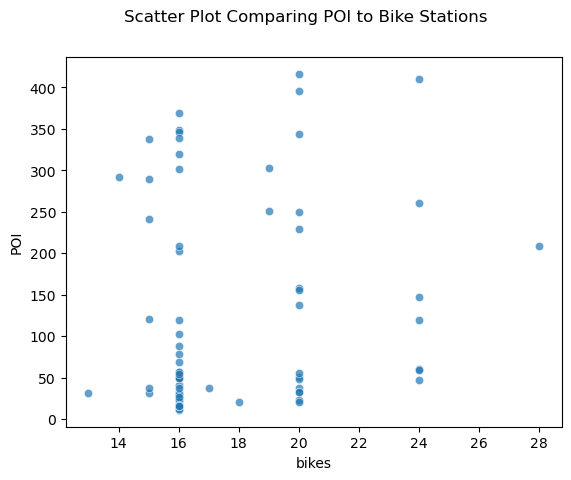

In [54]:
sns.scatterplot(data=final_df2, 
                x="bikes", 
                y="POI",
                alpha = 0.7)
plt.suptitle("Scatter Plot Comparing POI to Bike Stations")
plt.show()

In [52]:
X=final_df2["bikes"]
y=final_df2["POI"]

X = sm.add_constant(X) # adding a constant
lin_reg = sm.OLS(y,X)

model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    POI   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.898
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.173
Time:                        11:01:35   Log-Likelihood:                -460.78
No. Observations:                  74   AIC:                             925.6
Df Residuals:                      72   BIC:                             930.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6169     86.909      0.099      0.9